In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
70236,2020-04-19,Crawford,Arkansas,5033.0,4,0
454575,2020-08-21,Franklin,Kansas,20059.0,245,2
354272,2020-07-21,Bacon,Georgia,13005.0,348,5
213610,2020-06-06,Wright,Minnesota,27171.0,351,2
424414,2020-08-11,Tazewell,Virginia,51185.0,122,0
418093,2020-08-09,Douglas,Wisconsin,55031.0,173,0
314561,2020-07-08,Pushmataha,Oklahoma,40127.0,17,0
202418,2020-06-02,Bell,Texas,48027.0,391,4
177957,2020-05-25,Cottle,Texas,48101.0,4,1
356614,2020-07-21,Live Oak,Texas,48297.0,106,1


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
92189,2020-04-26,Albemarle,Virginia,51003.0,76,3,3.0,2.71
363201,2020-07-23,Charlottesville city,Virginia,51540.0,385,8,14.0,9.57
475938,2020-08-27,Albemarle,Virginia,51003.0,990,17,10.0,8.57
4338,2020-03-18,Charlottesville city,Virginia,51540.0,1,0,0.0,0.00
147920,2020-05-15,Charlottesville city,Virginia,51540.0,71,2,3.0,0.71
414630,2020-08-08,Albemarle,Virginia,51003.0,833,16,16.0,13.14
466244,2020-08-24,Albemarle,Virginia,51003.0,963,16,2.0,7.14
166018,2020-05-21,Albemarle,Virginia,51003.0,142,4,0.0,1.71
337559,2020-07-15,Albemarle,Virginia,51003.0,583,10,5.0,12.14
347179,2020-07-18,Charlottesville city,Virginia,51540.0,341,7,8.0,10.14


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
405,".Calhoun County, Georgia",6189.0,Calhoun,Georgia
1138,".Jefferson Parish, Louisiana",432493.0,Jefferson Parish,Louisiana
506,".Randolph County, Georgia",6778.0,Randolph,Georgia
2297,".Schuylkill County, Pennsylvania",141359.0,Schuylkill,Pennsylvania
1539,".Lincoln County, Missouri",59013.0,Lincoln,Missouri
2782,".Davis County, Utah",355481.0,Davis,Utah
498,".Pickens County, Georgia",32591.0,Pickens,Georgia
779,".Vermillion County, Indiana",15498.0,Vermillion,Indiana
2801,".Utah County, Utah",636235.0,Utah,Utah
2186,".Okmulgee County, Oklahoma",38465.0,Okmulgee,Oklahoma


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
156,2020-08-24,Albemarle,Virginia,51003.0,963,16,2.0,7.14,".Albemarle County, Virginia",109330.0,6.530687
157,2020-08-25,Albemarle,Virginia,51003.0,975,16,12.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
158,2020-08-26,Albemarle,Virginia,51003.0,980,17,5.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
159,2020-08-27,Albemarle,Virginia,51003.0,990,17,10.0,8.57,".Albemarle County, Virginia",109330.0,7.838654
160,2020-08-28,Albemarle,Virginia,51003.0,1002,18,12.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
161,2020-08-29,Albemarle,Virginia,51003.0,1022,18,20.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
162,2020-08-30,Albemarle,Virginia,51003.0,1027,18,5.0,9.43,".Albemarle County, Virginia",109330.0,8.625263
163,2020-08-31,Albemarle,Virginia,51003.0,1034,18,7.0,10.14,".Albemarle County, Virginia",109330.0,9.274673
164,2020-09-01,Albemarle,Virginia,51003.0,1042,18,8.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
165,2020-09-02,Albemarle,Virginia,51003.0,1052,18,10.0,10.29,".Albemarle County, Virginia",109330.0,9.411872


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
326,2020-08-24,Charlottesville city,Virginia,51540.0,589,16,1.0,4.14,".Charlottesville city, Virginia",47266.0,8.758939
327,2020-08-25,Charlottesville city,Virginia,51540.0,592,17,3.0,4.43,".Charlottesville city, Virginia",47266.0,9.372488
328,2020-08-26,Charlottesville city,Virginia,51540.0,595,17,3.0,4.14,".Charlottesville city, Virginia",47266.0,8.758939
329,2020-08-27,Charlottesville city,Virginia,51540.0,604,17,9.0,4.86,".Charlottesville city, Virginia",47266.0,10.282232
330,2020-08-28,Charlottesville city,Virginia,51540.0,623,17,19.0,6.86,".Charlottesville city, Virginia",47266.0,14.513604
331,2020-08-29,Charlottesville city,Virginia,51540.0,648,18,25.0,9.14,".Charlottesville city, Virginia",47266.0,19.337367
332,2020-08-30,Charlottesville city,Virginia,51540.0,674,18,26.0,12.29,".Charlottesville city, Virginia",47266.0,26.001777
333,2020-08-31,Charlottesville city,Virginia,51540.0,681,18,7.0,13.14,".Charlottesville city, Virginia",47266.0,27.800110
334,2020-09-01,Charlottesville city,Virginia,51540.0,686,18,5.0,13.43,".Charlottesville city, Virginia",47266.0,28.413659
335,2020-09-02,Charlottesville city,Virginia,51540.0,699,20,13.0,14.86,".Charlottesville city, Virginia",47266.0,31.439089


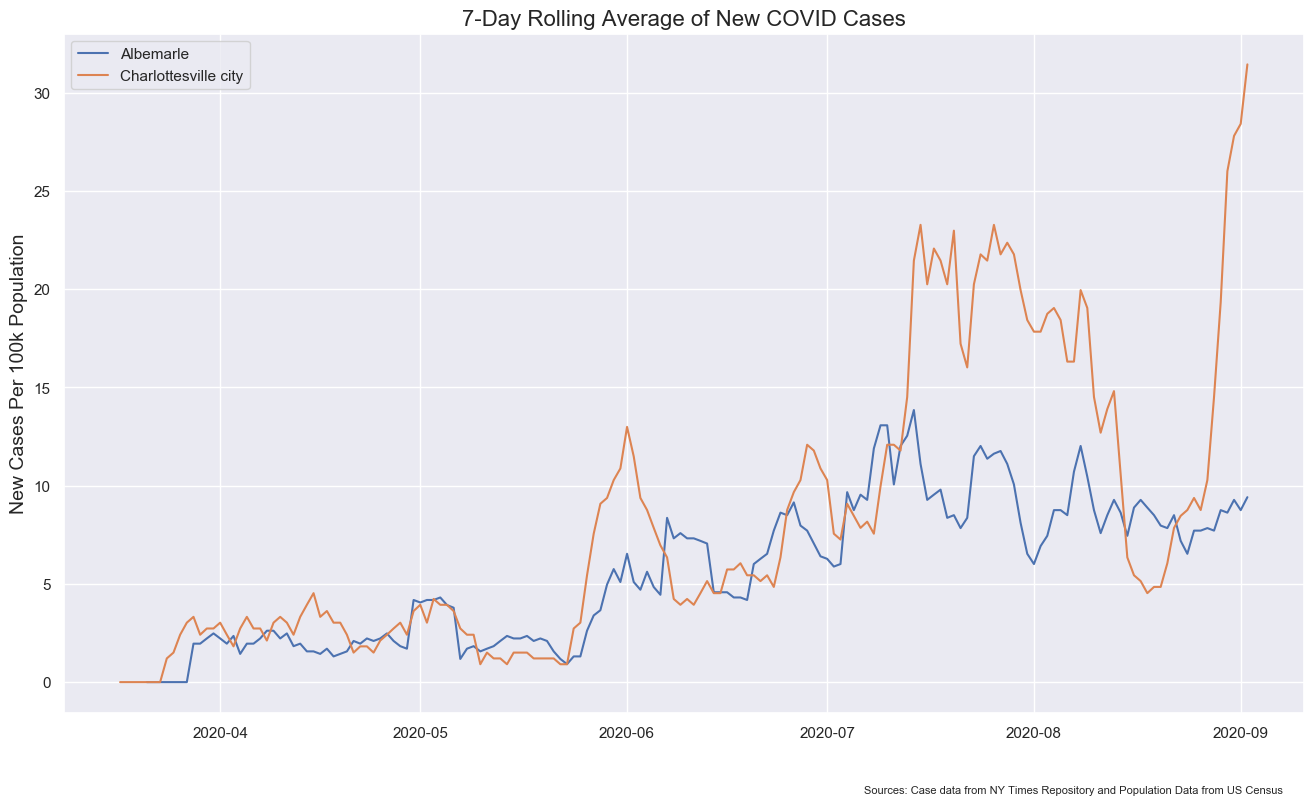

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')